**Цель работы:**
- Разработать алгоритм оценки времени в пути.
- Выдача результатов работы алгоритма через API

**Ход работы:**
1) Провести обзор и обработку данных (поиск дубликатов, пропусков, аномалий, анализ типов данных, статистический анализ данных).

2) Провести статистический анализ данных.

3) Подбор оптимальных моделей машинного обучения

4) Выводы

# ШАГ 1. Обзор данных

**Импортируем библиотеки**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import OneHotEncoder


In [2]:
try:
    df = pd.read_parquet("df_train.parquet", engine='pyarrow')
    df_test = pd.read_parquet("df_test.parquet", engine='pyarrow')
    csv_example = pd.read_csv('sub_example.csv')
    
except Exception as e:
        print('Exception:',  e.__class__)


In [3]:
df

,st_code_snd,st_code_rsv,date_depart_year,date_depart_month,date_depart_week,date_depart_day,date_depart_hour,fr_id,route_type,is_load,...,common_ch,vidsobst,distance,snd_org_id,rsv_org_id,snd_roadid,rsv_roadid,snd_dp_id,rsv_dp_id,y
0,wagonwagonwagontutu:)wagon,wagondigitalnewyearrailway:)happy,2021,11,45,12,14,3399.0,4.0,1,...,11.0,102.0,930.0,1098,5476,13,13,78,75,185.200000
1,railwaypgkhappyrailway:)railway,digitalhappynewyeardigital:)wagon,2021,4,15,17,16,2261.0,3.0,0,...,9.0,111.0,16.0,2974,6682,21,21,111,111,0.250000
2,railwaytutupgkpgk:)digital,pgkdigitalrailway:):)happy,2021,5,17,2,7,1089.0,3.0,1,...,9.0,111.0,879.0,2082,10729,9,9,67,23,109.133333
3,tuturailwaydigital2022:)digital,newyearnewyear20222022:)2022,2020,11,47,17,11,2261.0,4.0,0,...,975.0,103.0,8569.0,2974,10571,28,28,115,112,214.093056
4,railwaytutupgkpgk:)digital,pgkhappyrailwayhack:)railway,2020,12,52,25,5,1666.0,4.0,1,...,9.0,101.0,656.0,2082,9225,9,9,67,16,104.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219365,tutunewyearwagonhack:)happy,newyearwagondigitaltutu:)pgk,2021,12,49,8,16,2261.0,4.0,0,...,19.0,102.0,1177.0,2974,1424,6,6,129,70,112.233333
4219366,happy:)pgkrailway:)2022,railwaypgkrailwaydigital:)2022,2022,1,1,5,0,1666.0,4.0,1,...,9.0,102.0,2078.0,1290,10282,32,32,29,59,115.816667
4219367,wagonwagon2022newyear:)railway,newyearwagondigital2022:)railway,2020,5,22,31,15,2261.0,3.0,0,...,9.0,101.0,5336.0,1098,2942,13,13,77,111,190.718889
4219368,newyearwagonhappytutu:)2022,newyearwagonpgkhack:)newyear,2021,3,12,24,20,2261.0,3.0,0,...,9.0,101.0,1886.0,2974,3107,32,32,29,31,49.583333


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4219370 entries, 0 to 4219369
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   st_code_snd        object 
 1   st_code_rsv        object 
 2   date_depart_year   int64  
 3   date_depart_month  int64  
 4   date_depart_week   int64  
 5   date_depart_day    int64  
 6   date_depart_hour   int64  
 7   fr_id              float64
 8   route_type         float64
 9   is_load            int64  
 10  rod                int64  
 11  common_ch          float64
 12  vidsobst           float64
 13  distance           float64
 14  snd_org_id         int64  
 15  rsv_org_id         int64  
 16  snd_roadid         int32  
 17  rsv_roadid         int32  
 18  snd_dp_id          int64  
 19  rsv_dp_id          int64  
 20  y                  float64
dtypes: float64(6), int32(2), int64(11), object(2)
memory usage: 643.8+ MB


In [5]:
df.describe()

,date_depart_year,date_depart_month,date_depart_week,date_depart_day,date_depart_hour,fr_id,route_type,is_load,rod,common_ch,vidsobst,distance,snd_org_id,rsv_org_id,snd_roadid,rsv_roadid,snd_dp_id,rsv_dp_id,y
count,4.219370e+06,4.219370e+06,4.219370e+06,4.219370e+06,4.219370e+06,4.218993e+06,4.215940e+06,4.219370e+06,4.219370e+06,4.115528e+06,4.115453e+06,4.180599e+06,4.219370e+06,4.219370e+06,4.219370e+06,4.219370e+06,4.219370e+06,4.219370e+06,4.219370e+06
mean,2.020898e+03,6.324458e+00,2.584229e+01,1.573212e+01,1.120691e+01,1.251422e+04,3.197628e+00,3.261248e-01,7.092808e+00,1.482579e+02,1.055863e+02,1.435254e+03,3.571899e+03,5.083052e+03,1.768395e+01,1.768395e+01,6.655668e+01,7.064748e+01,1.062546e+02
std,6.624948e-01,3.447391e+00,1.515971e+01,8.769932e+00,6.908402e+00,3.038947e+04,9.494948e-01,4.687936e-01,2.471687e+00,3.365967e+02,2.237800e+01,1.814291e+03,2.754049e+03,4.213619e+03,1.087458e+01,1.087458e+01,4.200729e+01,4.143892e+01,1.260761e+02
min,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.010000e+02,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.020000e+03,3.000000e+00,1.300000e+01,8.000000e+00,5.000000e+00,1.666000e+03,3.000000e+00,0.000000e+00,8.000000e+00,9.000000e+00,1.020000e+02,2.480000e+02,2.974000e+03,1.494000e+03,9.000000e+00,9.000000e+00,2.900000e+01,2.900000e+01,2.485611e+01
50%,2.021000e+03,6.000000e+00,2.500000e+01,1.600000e+01,1.200000e+01,2.261000e+03,3.000000e+00,0.000000e+00,8.000000e+00,9.000000e+00,1.020000e+02,7.400000e+02,2.974000e+03,2.974000e+03,1.800000e+01,1.800000e+01,6.700000e+01,6.700000e+01,7.598333e+01
75%,2.021000e+03,9.000000e+00,3.900000e+01,2.300000e+01,1.700000e+01,2.261000e+03,4.000000e+00,1.000000e+00,8.000000e+00,1.900000e+01,1.030000e+02,1.879000e+03,2.974000e+03,8.213000e+03,2.900000e+01,2.900000e+01,1.100000e+02,1.110000e+02,1.493167e+02
max,2.022000e+03,1.200000e+01,5.300000e+01,3.100000e+01,2.300000e+01,1.000990e+05,4.000000e+00,1.000000e+00,1.500000e+01,9.750000e+02,9.090000e+02,3.589600e+04,1.740100e+04,1.740100e+04,3.500000e+01,3.500000e+01,1.350000e+02,1.350000e+02,1.093677e+04


# ШАГ 2. Предобработка данных.

## Считаем дубликаты

In [6]:
print('Дубликатов:', df.duplicated().sum())

Дубликатов: 0


## Считаем пропуски

In [7]:
df.isna().sum()

st_code_snd               0
st_code_rsv               0
date_depart_year          0
date_depart_month         0
date_depart_week          0
date_depart_day           0
date_depart_hour          0
fr_id                   377
route_type             3430
is_load                   0
rod                       0
common_ch            103842
vidsobst             103917
distance              38771
snd_org_id                0
rsv_org_id                0
snd_roadid                0
rsv_roadid                0
snd_dp_id                 0
rsv_dp_id                 0
y                         0
dtype: int64

**Комментарий**

Есть пропуски:
- `fr_id` - id груза, 377 пропусков. Скорее всего это поле вообще не понадобится
- `route_type` - тип отправки
- `common_ch` - id обобщённой характеристики вагона;
- `vidsobst` - вид собственности;
- `distance` - расстояние рейса - а вот это важная характеристика.


### Сколько станций отправления

In [8]:
list_uniq = []
for name in df.columns:
    list_uniq.append(len(df[name].unique()))

df_with_unique = pd.DataFrame({'columns':df.columns,
                                'unique_values':list_uniq})

df_with_unique.sort_values('unique_values', ascending=False)

,columns,unique_values
20,y,274915
15,rsv_org_id,15504
13,distance,10465
14,snd_org_id,5456
0,st_code_snd,3600
1,st_code_rsv,3549
7,fr_id,1507
19,rsv_dp_id,136
18,snd_dp_id,133
4,date_depart_week,53


### Уникальные типы отправки

In [9]:
print('Уникальных значений типа отправки: ', len(df['route_type'].unique())) 
df['route_type'].value_counts()

Уникальных значений типа отправки:  4


4.0    1877293
3.0    1816595
1.0     522052
Name: route_type, dtype: int64

**Комментарий**

Первое что приходит в голову - это все пропуски заменить на 2.

### Распределение типов загруженности 

In [10]:
df['is_load'].value_counts()

0    2843329
1    1376041
Name: is_load, dtype: int64

### Род подвижного состава

In [11]:
print('Уникальных значений рода подвижного состава: ', len(df['rod'].unique())) 
df['rod'].value_counts()

Уникальных значений рода подвижного состава:  10


8     2785657
2      719767
9      293130
10     208450
5       93455
7       91932
15      23660
1        2195
11       1057
3          67
Name: rod, dtype: int64

###  Различные типы обобщенной характеристики вагона


In [12]:
print('Уникальных значений характеристики типа подвижного состава: ', len(df['common_ch'].unique())) 
df['common_ch'].value_counts()

Уникальных значений характеристики типа подвижного состава:  22


9.0      2015870
975.0     585031
2.0       289280
19.0      287079
11.0      213207
18.0      201006
12.0      184388
10.0      158126
35.0       86170
26.0       50741
39.0       14241
27.0       10181
40.0        9415
36.0        6014
13.0        4349
17.0         294
3.0           67
14.0          44
7.0            9
5.0            8
8.0            8
Name: common_ch, dtype: int64

**Комментарий**

Можно заменить пропуски 0 или 9

###  Виды собственности


In [13]:
print('Уникальных значений видов собственности: ', len(df['vidsobst'].unique())) 
df['vidsobst'].value_counts()



Уникальных значений видов собственности:  11


102.0    1865730
101.0     963439
103.0     733158
111.0     487673
205.0      36119
322.0      26841
500.0       2308
505.0        120
135.0         57
909.0          8
Name: vidsobst, dtype: int64

**Комментарий**

Можно заменить пропуски 0 или 102

###  Расстояние


In [14]:
print('Уникальных значений расстояний: ', len(df['distance'].unique())) 

Уникальных значений расстояний:  10465


###  ID грузоотправителя


In [15]:
print('Уникальных значений id грузоотправителя: ', len(df['snd_org_id'].unique())) 

Уникальных значений id грузоотправителя:  5456


###  ID грузоотправителя


In [16]:
print('Уникальных значений id грузополучателя: ', len(df['rsv_org_id'].unique())) 

Уникальных значений id грузополучателя:  15504


### Заменим пропуски

In [17]:
df['fr_id'] = df['fr_id'].fillna(0)
df['route_type'] = df['route_type'].fillna(2)


### Приведение типов

In [18]:
df['fr_id'] = df['fr_id'].astype('int32')
df['route_type'] = df['route_type'].astype('int32')


### Восполним пропущенное расстояние

In [19]:
df_merged = df.append(df_test, ignore_index=True)


/var/folders/w7/t581y1mj0wn2618yn366tvyh0000gn/T/ipykernel_85003/4112827078.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df.append(df_test, ignore_index=True)


In [20]:
le = LabelEncoder()
list1 = list(df_merged['st_code_rsv'])
list1.extend(list(df_merged['st_code_snd']))
le.fit(list1)
df_merged['st_code_snd'] = le.transform(df_merged['st_code_snd'])
df_merged['st_code_rsv'] = le.transform(df_merged['st_code_rsv'])


In [21]:
list_from = list(df_merged['st_code_rsv'])
list_to = list(df_merged['st_code_snd'])
list_rout = []

for i in range(len(list_from)):
    list_rout.append(str(min(list_from[i], list_to[i])) + str(max(list_from[i], list_to[i])))


df_merged['route_code'] = list_rout

In [22]:
df['distance'] = df['distance'].fillna(df_merged.groupby('route_code')['distance']
                                             .transform("median"))
df['distance'] = df['distance'].fillna(100)

### Закодируем `route_type`  

### Заполним пропуски в хар вагона

In [23]:
df['common_ch']  = df['common_ch'].fillna(df_merged['common_ch'].median())


## Найдем скорость

### Корреляция признаков

<AxesSubplot:>

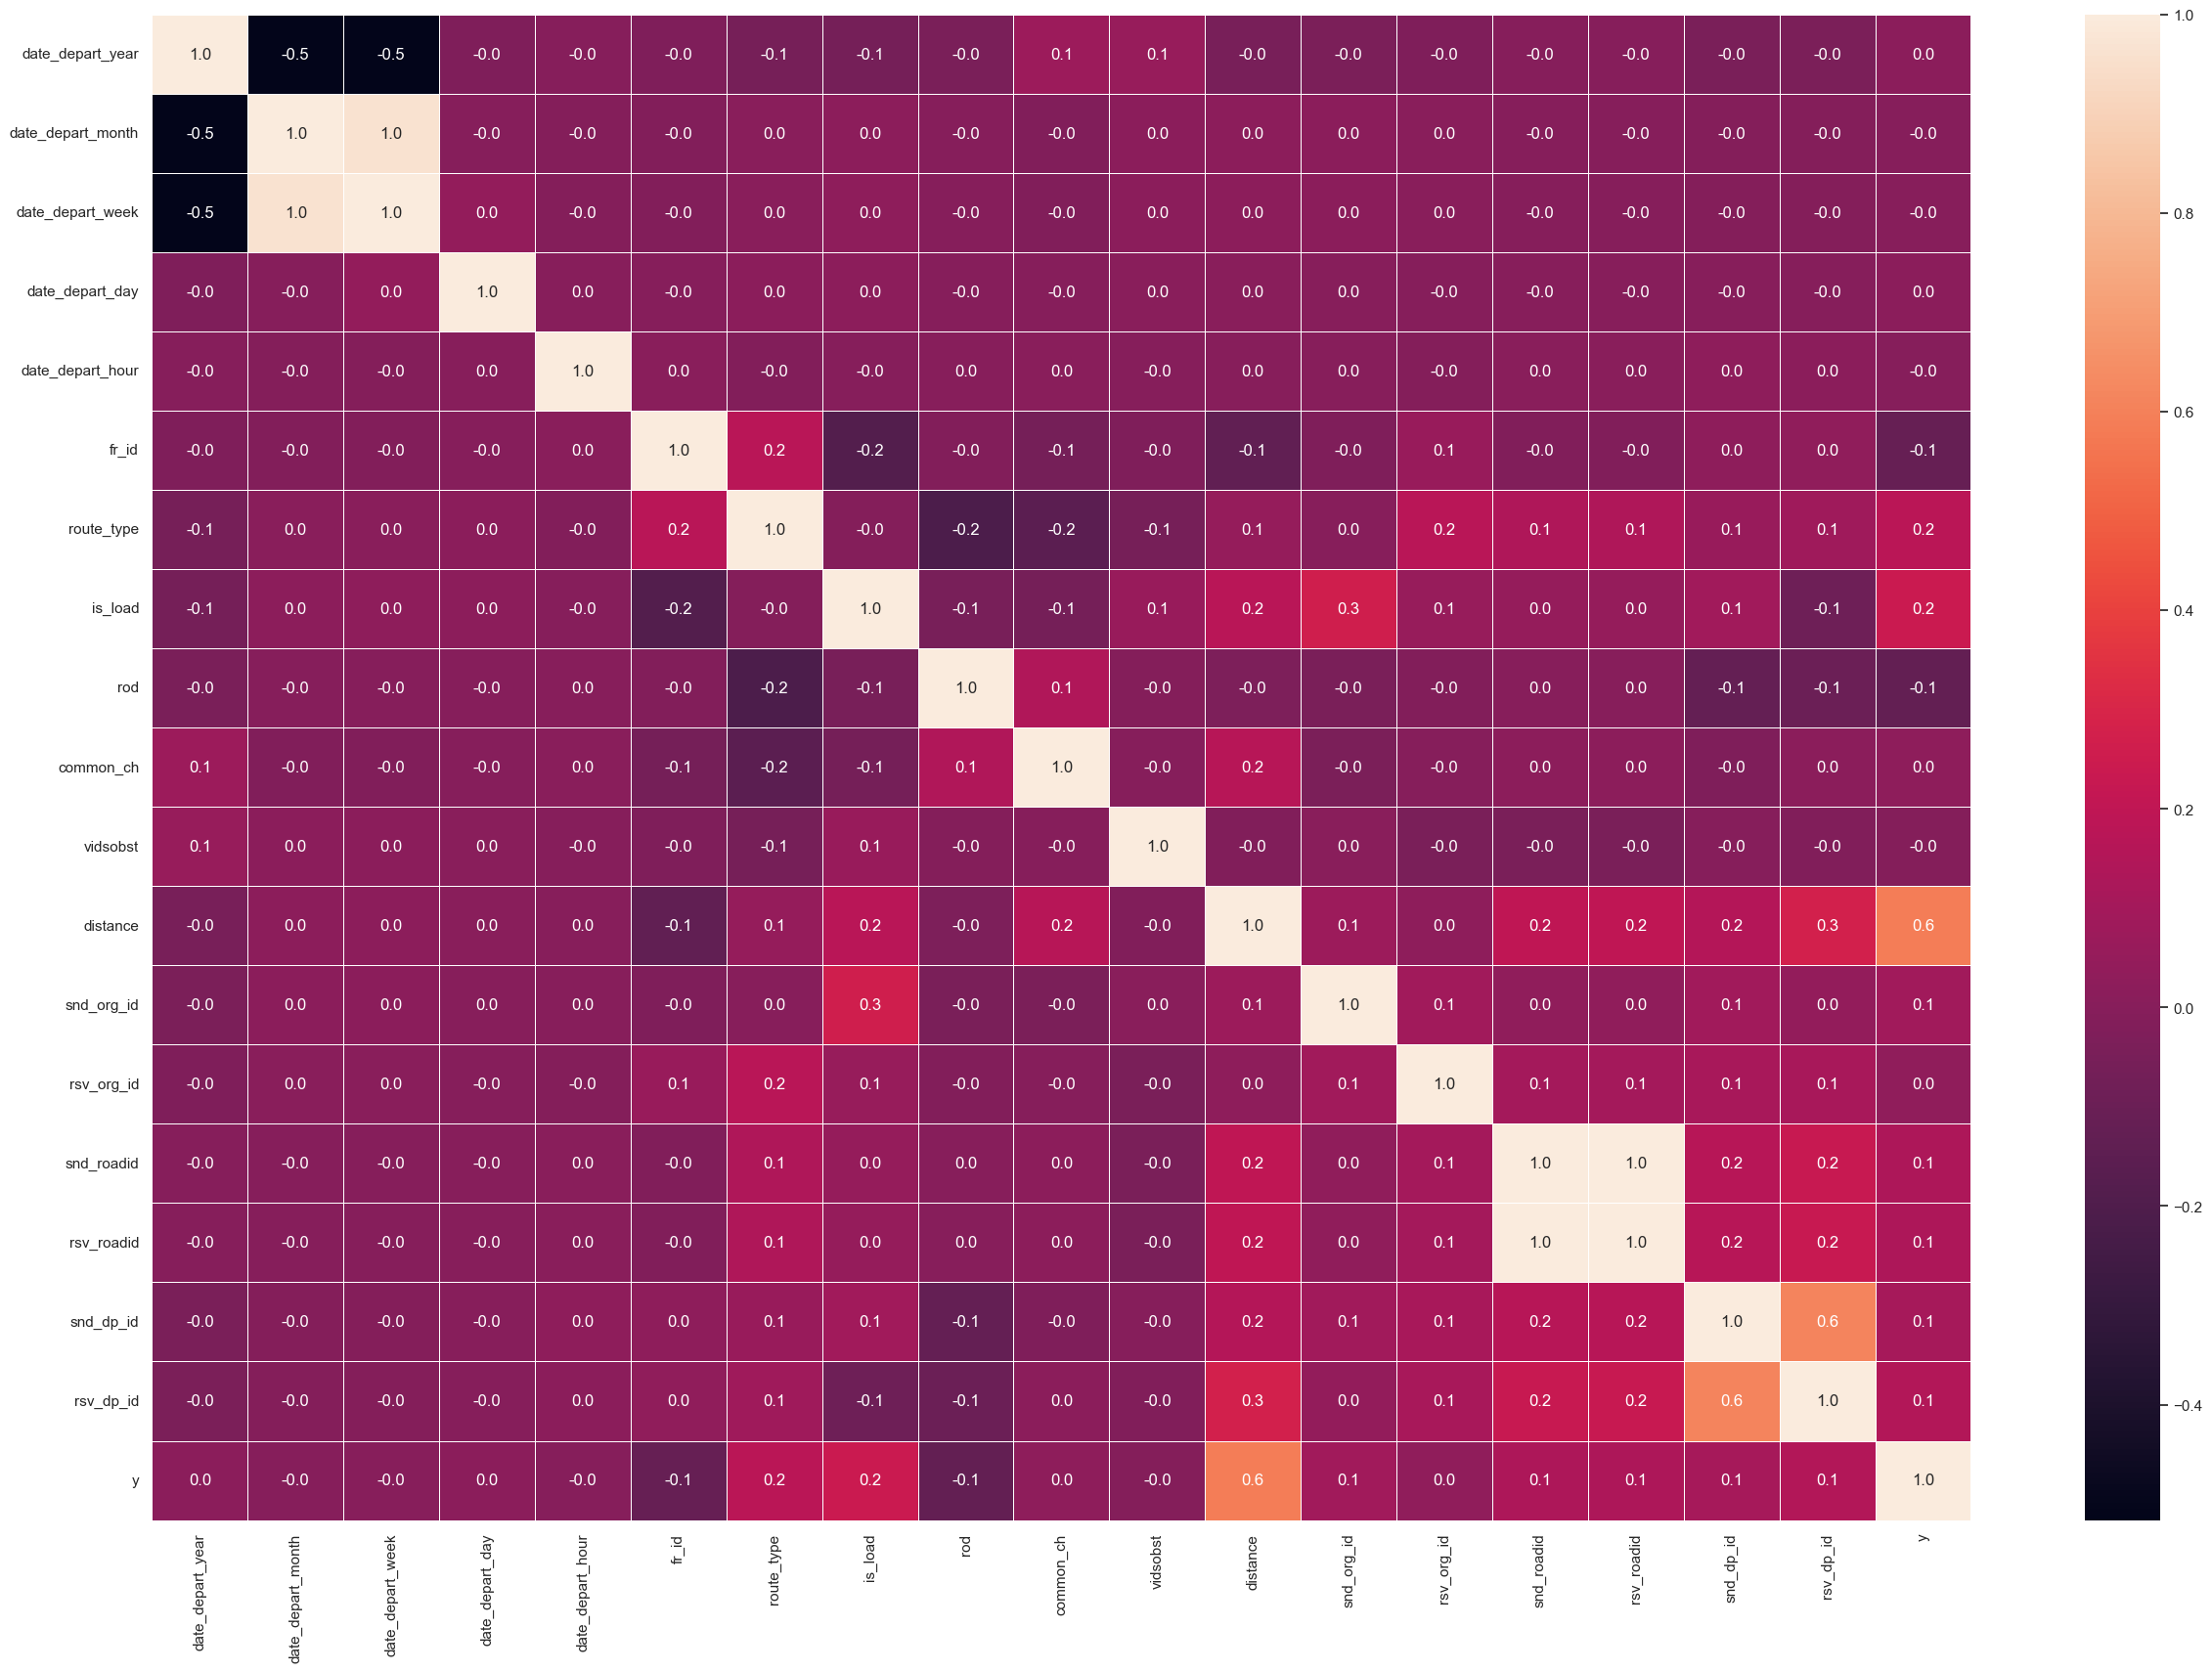

In [24]:
sns.set(rc = {'figure.figsize':(30,20)})

sns.heatmap(df.corr(),annot=True, fmt=".1f", linewidths=.5)

# Машинное обучение

In [32]:
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor as XGB

import math
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
X = df.drop(['st_code_snd','st_code_rsv', 'fr_id', 'vidsobst',
             'y'], axis=1)
y= df[['y']]

#'date_depart_year',
 #            'st_code_snd', 'st_code_rsv', 'speed_by_rod',
#            'route_code', 'route_type', 'speed', 'speed_by_common_ch',

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### Стандартизируем данные методом StandartScaler


In [37]:
scaler = StandardScaler()
scaler.fit(X)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Функция расчета ошибки

In [30]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'RMSE:{:.2f}'.format(
            math.sqrt(mean_squared_error(y_test, y_pred)),
            #cross_val_score(model, X_train, y_train, cv=5).mean()
        ))
    return model
    

### Проверка моделей

#### Лассо регрессия

In [38]:
print('Lasso: ')
Lasso = make_prediction(Lasso(), X_train_st, y_train, X_test_st, y_test)

Lasso: 
RMSE:97.98


#### Ридж регрессия

In [39]:
print('Ridge: ')
Ridge = make_prediction(Ridge(), X_train_st, y_train, X_test_st, y_test)

Ridge: 
RMSE:97.92


#### Дерево решений

In [ ]:
%%time
print('Дерево решений: ')
m = DecisionTreeRegressor()
DecisionTreeRegressor = make_prediction(m, X_train_st, y_train, X_test_st, y_test)

#### XGB

In [41]:
from xgboost import XGBRegressor as XGB


In [42]:
%%time
print('XGB: ')
m = XGB()
XGB = make_prediction(m, X_train_st, y_train, X_test_st, y_test)

XGB: 
RMSE:76.12
CPU times: user 21min 50s, sys: 21 s, total: 22min 11s
Wall time: 3min 23s


In [40]:
print('Cat: ')
cat = make_prediction(CatBoostRegressor(), X_train_st, y_train, X_test_st, y_test)

Cat: 
Learning rate set to 0.147794
0:	learn: 118.6161506	total: 260ms	remaining: 4m 19s
1:	learn: 112.7577651	total: 404ms	remaining: 3m 21s
2:	learn: 108.2885167	total: 580ms	remaining: 3m 12s
3:	learn: 104.7330005	total: 724ms	remaining: 3m
4:	learn: 101.8553014	total: 871ms	remaining: 2m 53s
5:	learn: 99.6719223	total: 1s	remaining: 2m 45s
6:	learn: 97.9468693	total: 1.17s	remaining: 2m 46s
7:	learn: 96.6084411	total: 1.32s	remaining: 2m 43s
8:	learn: 95.5360746	total: 1.46s	remaining: 2m 41s
9:	learn: 94.6318557	total: 1.6s	remaining: 2m 38s
10:	learn: 93.9877770	total: 1.76s	remaining: 2m 38s
11:	learn: 93.2262738	total: 1.91s	remaining: 2m 37s
12:	learn: 92.7537385	total: 2.07s	remaining: 2m 37s
13:	learn: 92.1248914	total: 2.23s	remaining: 2m 37s
14:	learn: 91.8084413	total: 2.38s	remaining: 2m 36s
15:	learn: 91.5021224	total: 2.54s	remaining: 2m 35s
16:	learn: 91.2567435	total: 2.69s	remaining: 2m 35s
17:	learn: 90.8259698	total: 2.82s	remaining: 2m 33s
18:	learn: 90.6328322	t

154:	learn: 81.0281729	total: 24.1s	remaining: 2m 11s
155:	learn: 81.0131444	total: 24.3s	remaining: 2m 11s
156:	learn: 80.9987035	total: 24.5s	remaining: 2m 11s
157:	learn: 80.9820770	total: 24.6s	remaining: 2m 11s
158:	learn: 80.9285115	total: 24.8s	remaining: 2m 11s
159:	learn: 80.8863522	total: 25s	remaining: 2m 11s
160:	learn: 80.8655817	total: 25.1s	remaining: 2m 10s
161:	learn: 80.8050672	total: 25.3s	remaining: 2m 10s
162:	learn: 80.7939740	total: 25.5s	remaining: 2m 10s
163:	learn: 80.7792858	total: 25.6s	remaining: 2m 10s
164:	learn: 80.7590691	total: 25.8s	remaining: 2m 10s
165:	learn: 80.7476732	total: 25.9s	remaining: 2m 10s
166:	learn: 80.7132130	total: 26.1s	remaining: 2m 10s
167:	learn: 80.6957142	total: 26.2s	remaining: 2m 9s
168:	learn: 80.6609495	total: 26.4s	remaining: 2m 9s
169:	learn: 80.6442099	total: 26.6s	remaining: 2m 9s
170:	learn: 80.6150629	total: 26.8s	remaining: 2m 9s
171:	learn: 80.5963621	total: 27s	remaining: 2m 9s
172:	learn: 80.5721868	total: 27.1s	r

308:	learn: 78.1580335	total: 47.8s	remaining: 1m 46s
309:	learn: 78.1471713	total: 48s	remaining: 1m 46s
310:	learn: 78.1257454	total: 48.2s	remaining: 1m 46s
311:	learn: 78.1006301	total: 48.5s	remaining: 1m 46s
312:	learn: 78.0836742	total: 48.7s	remaining: 1m 46s
313:	learn: 78.0652378	total: 48.9s	remaining: 1m 46s
314:	learn: 78.0556798	total: 49.1s	remaining: 1m 46s
315:	learn: 78.0443746	total: 49.2s	remaining: 1m 46s
316:	learn: 78.0349265	total: 49.4s	remaining: 1m 46s
317:	learn: 78.0187656	total: 49.6s	remaining: 1m 46s
318:	learn: 78.0117345	total: 49.8s	remaining: 1m 46s
319:	learn: 77.9976963	total: 50s	remaining: 1m 46s
320:	learn: 77.9920346	total: 50.1s	remaining: 1m 46s
321:	learn: 77.9814265	total: 50.3s	remaining: 1m 45s
322:	learn: 77.9701369	total: 50.4s	remaining: 1m 45s
323:	learn: 77.9643817	total: 50.6s	remaining: 1m 45s
324:	learn: 77.9590421	total: 50.7s	remaining: 1m 45s
325:	learn: 77.9328972	total: 50.9s	remaining: 1m 45s
326:	learn: 77.9204764	total: 51

461:	learn: 76.5269729	total: 1m 11s	remaining: 1m 23s
462:	learn: 76.5211976	total: 1m 11s	remaining: 1m 23s
463:	learn: 76.4960421	total: 1m 12s	remaining: 1m 23s
464:	learn: 76.4917635	total: 1m 12s	remaining: 1m 23s
465:	learn: 76.4844616	total: 1m 12s	remaining: 1m 22s
466:	learn: 76.4450112	total: 1m 12s	remaining: 1m 22s
467:	learn: 76.4414332	total: 1m 12s	remaining: 1m 22s
468:	learn: 76.4374991	total: 1m 12s	remaining: 1m 22s
469:	learn: 76.4321752	total: 1m 12s	remaining: 1m 22s
470:	learn: 76.4208994	total: 1m 13s	remaining: 1m 22s
471:	learn: 76.4156922	total: 1m 13s	remaining: 1m 21s
472:	learn: 76.4110660	total: 1m 13s	remaining: 1m 21s
473:	learn: 76.3966664	total: 1m 13s	remaining: 1m 21s
474:	learn: 76.3866933	total: 1m 13s	remaining: 1m 21s
475:	learn: 76.3801900	total: 1m 13s	remaining: 1m 21s
476:	learn: 76.3736721	total: 1m 13s	remaining: 1m 21s
477:	learn: 76.3637546	total: 1m 14s	remaining: 1m 20s
478:	learn: 76.3584470	total: 1m 14s	remaining: 1m 20s
479:	learn

613:	learn: 75.4393839	total: 1m 36s	remaining: 1m
614:	learn: 75.4307825	total: 1m 36s	remaining: 1m
615:	learn: 75.4265927	total: 1m 36s	remaining: 1m
616:	learn: 75.4210406	total: 1m 36s	remaining: 59.9s
617:	learn: 75.4122301	total: 1m 36s	remaining: 59.8s
618:	learn: 75.4086652	total: 1m 36s	remaining: 59.6s
619:	learn: 75.4028790	total: 1m 36s	remaining: 59.4s
620:	learn: 75.3917777	total: 1m 37s	remaining: 59.3s
621:	learn: 75.3797456	total: 1m 37s	remaining: 59.1s
622:	learn: 75.3748860	total: 1m 37s	remaining: 58.9s
623:	learn: 75.3710685	total: 1m 37s	remaining: 58.8s
624:	learn: 75.3674243	total: 1m 37s	remaining: 58.6s
625:	learn: 75.3638825	total: 1m 37s	remaining: 58.4s
626:	learn: 75.3588240	total: 1m 37s	remaining: 58.3s
627:	learn: 75.3360342	total: 1m 38s	remaining: 58.1s
628:	learn: 75.3318275	total: 1m 38s	remaining: 58s
629:	learn: 75.3277117	total: 1m 38s	remaining: 57.8s
630:	learn: 75.3227983	total: 1m 38s	remaining: 57.6s
631:	learn: 75.3176211	total: 1m 38s	re

766:	learn: 74.5851590	total: 1m 59s	remaining: 36.4s
767:	learn: 74.5816265	total: 1m 59s	remaining: 36.2s
768:	learn: 74.5769770	total: 1m 59s	remaining: 36s
769:	learn: 74.5718505	total: 2m	remaining: 35.9s
770:	learn: 74.5679167	total: 2m	remaining: 35.7s
771:	learn: 74.5570936	total: 2m	remaining: 35.6s
772:	learn: 74.5528222	total: 2m	remaining: 35.4s
773:	learn: 74.5503389	total: 2m	remaining: 35.2s
774:	learn: 74.5464779	total: 2m	remaining: 35.1s
775:	learn: 74.5341050	total: 2m 1s	remaining: 34.9s
776:	learn: 74.5267189	total: 2m 1s	remaining: 34.8s
777:	learn: 74.5240133	total: 2m 1s	remaining: 34.6s
778:	learn: 74.5209645	total: 2m 1s	remaining: 34.5s
779:	learn: 74.5182968	total: 2m 1s	remaining: 34.3s
780:	learn: 74.5092932	total: 2m 1s	remaining: 34.1s
781:	learn: 74.5013282	total: 2m 1s	remaining: 34s
782:	learn: 74.4980764	total: 2m 2s	remaining: 33.8s
783:	learn: 74.4950310	total: 2m 2s	remaining: 33.7s
784:	learn: 74.4885770	total: 2m 2s	remaining: 33.5s
785:	learn: 

921:	learn: 73.8742647	total: 2m 22s	remaining: 12.1s
922:	learn: 73.8686434	total: 2m 22s	remaining: 11.9s
923:	learn: 73.8651748	total: 2m 22s	remaining: 11.7s
924:	learn: 73.8571622	total: 2m 22s	remaining: 11.6s
925:	learn: 73.8542812	total: 2m 23s	remaining: 11.4s
926:	learn: 73.8516275	total: 2m 23s	remaining: 11.3s
927:	learn: 73.8497160	total: 2m 23s	remaining: 11.1s
928:	learn: 73.8461250	total: 2m 23s	remaining: 11s
929:	learn: 73.8429438	total: 2m 23s	remaining: 10.8s
930:	learn: 73.8391800	total: 2m 23s	remaining: 10.7s
931:	learn: 73.8376985	total: 2m 24s	remaining: 10.5s
932:	learn: 73.8345567	total: 2m 24s	remaining: 10.4s
933:	learn: 73.8320215	total: 2m 24s	remaining: 10.2s
934:	learn: 73.8241343	total: 2m 24s	remaining: 10s
935:	learn: 73.8201635	total: 2m 24s	remaining: 9.89s
936:	learn: 73.8180026	total: 2m 24s	remaining: 9.74s
937:	learn: 73.8137297	total: 2m 25s	remaining: 9.59s
938:	learn: 73.8105604	total: 2m 25s	remaining: 9.43s
939:	learn: 73.8086583	total: 2m

In [43]:
predict_df=pd.DataFrame({'XGB':XGB.predict(X_test_st),
                       "Cat": cat.predict(X_test_st)
                        }) 

In [44]:
predict_df['mean_predict'] = (predict_df['XGB']+predict_df['Cat'])/2

In [45]:
math.sqrt(mean_squared_error(y_test, predict_df['mean_predict']))

75.41331830550476

- Без типа собственности XGB: **RMSE:80.94**
- С типом собственности и заменили пропуски на 102 **RMSE:80.56**
- Без типа собственности XGB: **RMSE:80.94**
- Без типа собственности  XGB(max_depth=6, learning_rate=1): **RMSE:79.27** 
- XGB со всеми характеристиками: **RMSE:79.43**


- Без типа собственности Сат: **RMSE:77.69**
- С типом собственности и заменили пропуски на 102 Cat: **RMSE:77.10**
- С типом собственности и заменили пропуски на 102 Cat: **RMSE:77.10**
- Сat со всеми характеристиками: **RMSE:73.79**

- XGB(max_depth=6, learning_rate=1) без `vidsobst` + Сат с `vidsobst`:**RMSE:76.07**
- XGB(max_depth=6, learning_rate=1,  n_estimators=26)  + Cat со всеми характеристиками: **RMSE:75.00**
- XGB(max_depth=6, learning_rate=1,  n_estimators=26)  + Cat со всеми хар + дерево: **RMSE:74.31**






# Подготовка тестовго датасета

In [ ]:
df_test 

In [ ]:
df_test.isna().sum()

### Восполним пропущенное расстояние

In [46]:
df_test['distance'] = df_test['distance'].fillna(df_merged.groupby('route_code')['distance']
                                             .transform("median"))
df_test['distance'] = df_test['distance'].fillna(100)

In [47]:
df_test['fr_id'] = df_test['fr_id'].fillna(df_merged['fr_id'].median())

In [48]:
df_test['fr_id'] = df_test['fr_id'].astype('int32')
df_test['route_type'] = df_test['route_type'].astype('int32')
df_test['distance'] = df_test['distance'].astype('int32')


# Обучение модели

In [49]:
X_finall = df_test.drop(['st_code_snd','st_code_rsv', 'fr_id', 'vidsobst',], axis=1)

### Стандартизируем данные методом StandartScaler


In [50]:
X_test_scaler = scaler.transform(X_finall)

### Получим предсказания

In [51]:
df_finall=pd.DataFrame({'XGB':XGB.predict(X_test_scaler),
                       "Cat": cat.predict(X_test_scaler)
                        # "Tree": DecisionTreeRegressor.predict(X_test_scaler)
                        }) 

In [52]:
df_finall['mean_predict'] = (df_finall['XGB']+df_finall['Cat'])/2

In [53]:
df_finall=pd.DataFrame({'time':list(df_finall['mean_predict'])})

In [54]:
df_finall['time'] = df_finall['time'].astype('int')


In [55]:
df_finall.to_csv('time_Cat+XGB.csv')

In [ ]:
df.T

In [ ]:
df_l=pd.DataFrame({'common_ch(общие хар-ки вагона)':df['common_ch'].unique()})
df_l= df_l.astype('int')
df_l.to_csv('common_ch.csv')